In [90]:
from utils import *
%matplotlib inline

# ML libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1. Prepare data

In [4]:
# loading the data we prepared before
df = pd.read_csv('data.csv')
df.head()

,Year,Construction Enterprises,Employees,Intermediate consumption,Labour Costs,Persons Engaged,Production value,Turnover,Wages and Salaries
0,2008,61905.0,145740.0,24623781.0,7383211.0,190069.0,35619219.0,38090615.0,6248254.0
1,2009,57472.0,96249.0,15860338.0,5464978.0,134313.0,19955700.0,24070238.0,4631607.0
2,2010,52607.0,69777.0,12219217.0,3764831.0,104545.0,14049112.0,17712899.0,3161945.0
3,2011,50256.0,61197.0,11662303.0,2748647.0,94640.0,13532292.0,15577448.0,2336554.0
4,2012,49530.0,55736.0,4652157.0,2471185.0,89351.0,7903454.0,8797406.0,2134799.0


In [12]:
df.isnull().sum()

Year                        0
Construction Enterprises    0
Employees                   0
Intermediate consumption    0
Labour Costs                0
Persons Engaged             0
Production value            0
Turnover                    0
Wages and Salaries          0
dtype: int64

In [13]:
df.info() # check any categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      12 non-null     int64  
 1   Construction Enterprises  12 non-null     float64
 2   Employees                 12 non-null     float64
 3   Intermediate consumption  12 non-null     float64
 4   Labour Costs              12 non-null     float64
 5   Persons Engaged           12 non-null     float64
 6   Production value          12 non-null     float64
 7   Turnover                  12 non-null     float64
 8   Wages and Salaries        12 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 992.0 bytes


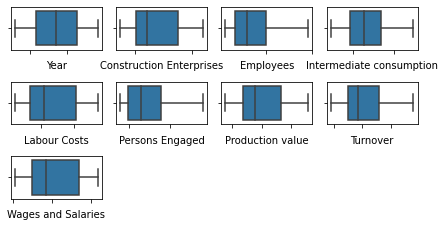

In [9]:
show_outliers(df)

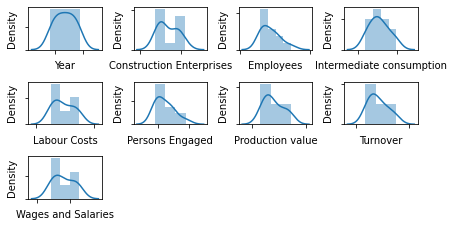

In [11]:
show_distribution(df);

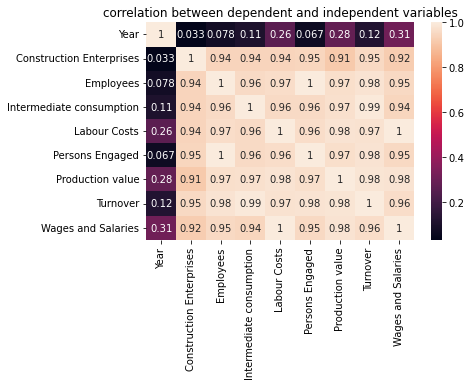

In [35]:
sns.heatmap(df.corr(), annot=True);
plt.title('correlation between dependent and independent variables');
# using set_index to remove Year from the plot

Target variable (Wages and Salaries) is highly correlated with the independent values. We'll keep Year as index and remove it from the X classes.

In [38]:
df.set_index('Year', inplace=True)
df.head(2)

,Construction Enterprises,Employees,Intermediate consumption,Labour Costs,Persons Engaged,Production value,Turnover,Wages and Salaries
Year,,,,,,,,
2008,61905.0,145740.0,24623781.0,7383211.0,190069.0,35619219.0,38090615.0,6248254.0
2009,57472.0,96249.0,15860338.0,5464978.0,134313.0,19955700.0,24070238.0,4631607.0


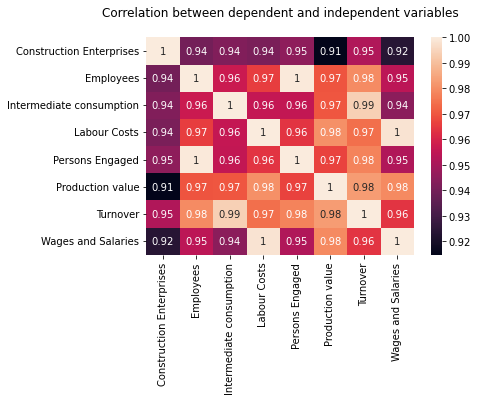

In [179]:
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation between dependent and independent variables\n');

#### Split data into test and train

In [174]:
X = df.drop(['Wages and Salaries'], axis=1)
y = df['Wages and Salaries']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) # 67% training and 33% test // found out by 1 - test_size = 1 - 0.33 = 0.67 -> 67%
X_train.shape, X_test.shape

((8, 7), (4, 7))

#### Scaling data

In [175]:
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Relationship between target and features

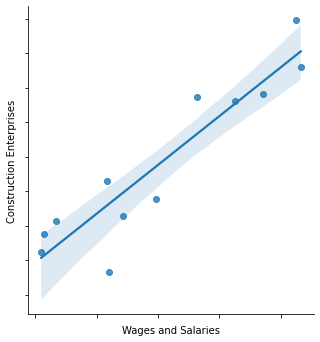

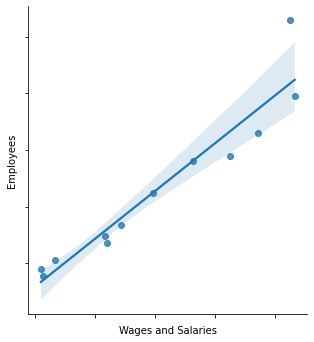

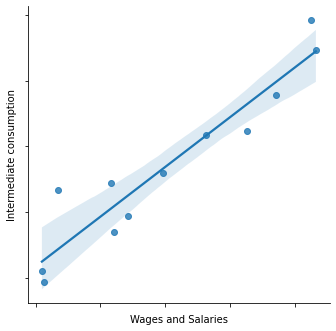

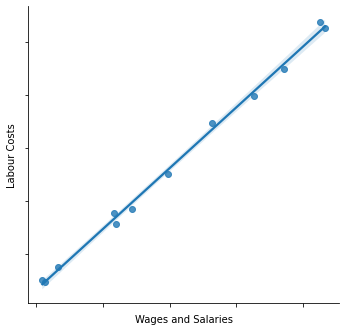

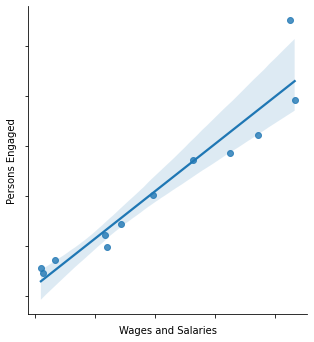

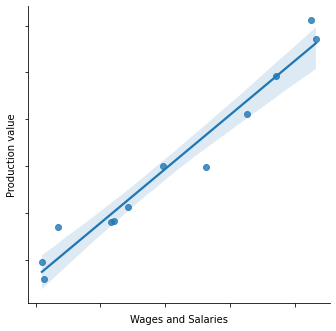

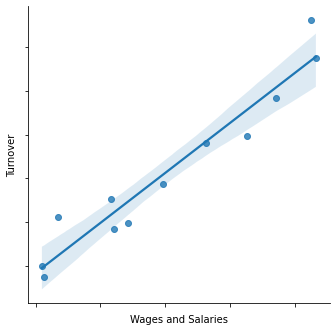

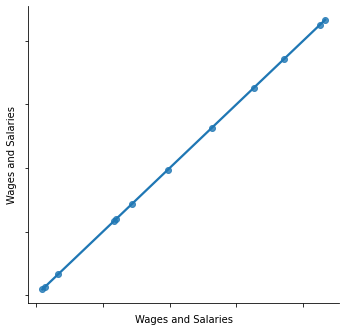

In [69]:
# visually see correlation between target and features to validate relationship is linear
features = [col for col in df.columns if col != 'Wages and Salaries']

for i, col in enumerate(df.columns, 1):
    g = sns.lmplot(x='Wages and Salaries', y=col, data=df)
    g.set(yticklabels=[])
    g.set(xticklabels=[])


Summary
- data highly correlated
- data is scaled
- distribution lightly skewed on the left, we can assume normal
- relationship between target and features is linear

### 1. Apply models

#### Linear regression

In [66]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

output=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Difference': (y_test - y_pred)})
output.head()

,Actual,Predicted,Difference
Year,,,
2014,3203597.0,3.029315e+06,174281.719032
2019,6327796.0,6.198000e+06,129796.207359
2012,2134799.0,2.086900e+06,47898.753070
2018,5716307.0,5.548836e+06,167471.176080


In [67]:
# evaluation - r^2
print('The precision of the training data: %.2f '% regr.score(X_train, y_train))
print('The precision of the test data: %.2f'% regr.score(X_test, y_test))

The precision of the training data: 1.00 
The precision of the test data: 0.99


In [70]:
import math 

# The mean absolute error - doesn't say if it is too high or low
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))

# The mean squared error
model_mse = mean_squared_error(y_test,y_pred)

print("Mean squared error: %.2f" % model_mse)

model_rmse = math.sqrt(model_mse)
# The root mean squared error
print("Root mean squared error: %.2f" % model_rmse)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Mean absolute error: 129861.96
Mean squared error: 19390514599.17
Root mean squared error: 139249.83
Coefficient of determination: 0.99


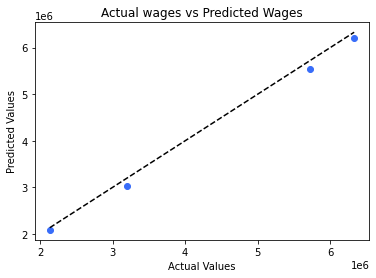

In [74]:
# create a scatter plot with actual vs predicted values
plt.scatter(y_test, y_pred)

# set x and y axis labels
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Actual wages vs Predicted Wages'); 

# show the plot
plt.show()

#### Lasso

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))

In [80]:
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)
# get cross val scores
#get_cv_scores(lasso)

print('The precision of the training data: ', lasso.score(X_train, y_train))
print('The precision of the test data: ', lasso.score(X_test, y_test))
print('-')
get_cv_scores(lasso)

The precision of the training data:  0.9996962437444686
The precision of the test data:  0.9973361011745144
-
CV Mean:  nan
STD:  nan


In [81]:
y_pred = lasso.predict(X_test)

output=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Difference': (y_test - y_pred)})
output.head()

,Actual,Predicted,Difference
Year,,,
2014,3203597.0,3.061181e+06,142415.671665
2019,6327796.0,6.409092e+06,-81295.607681
2012,2134799.0,2.064180e+06,70618.990477
2018,5716307.0,5.725681e+06,-9374.448187


In [82]:
import math 

# The mean absolute error - doesn't say if it is too high or low
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))

# The mean squared error
model_mse = mean_squared_error(y_test,y_pred)

print("Mean squared error: %.2f" % model_mse)

model_rmse = math.sqrt(model_mse)
# The root mean squared error
print("Root mean squared error: %.2f" % model_rmse)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Mean absolute error: 75926.18
Mean squared error: 7991530364.67
Root mean squared error: 89395.36
Coefficient of determination: 1.00


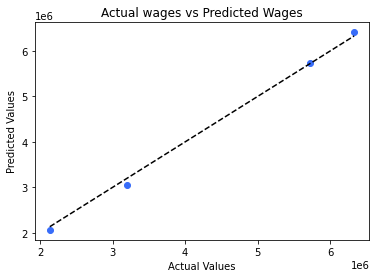

In [83]:
# create a scatter plot with actual vs predicted values
plt.scatter(y_test, y_pred)

# set x and y axis labels
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Actual wages vs Predicted Wages'); 

# show the plot
plt.show()

#### Ridge

In [85]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)
print('The precision of the training data: ',ridge.score(X_train, y_train))
print('The precision of the test data: ', ridge.score(X_test, y_test))

CV Mean:  nan
STD:  nan
The precision of the training data:  0.9715397123012403
The precision of the test data:  0.9645172352031998


In [86]:
y_pred = ridge.predict(X_test)

output=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Difference': (y_test - y_pred)})
output.head()

,Actual,Predicted,Difference
Year,,,
2014,3203597.0,2.857584e+06,346013.262044
2019,6327796.0,5.946838e+06,380958.431107
2012,2134799.0,2.252267e+06,-117468.202326
2018,5716307.0,5.332730e+06,383576.648035


In [87]:
# The mean absolute error - doesn't say if it is too high or low
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))

# The mean squared error
model_mse = mean_squared_error(y_test,y_pred)

print("Mean squared error: %.2f" % model_mse)

model_rmse = math.sqrt(model_mse)
# The root mean squared error
print("Root mean squared error: %.2f" % model_rmse)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Mean absolute error: 307004.14
Mean squared error: 106446081804.27
Root mean squared error: 326260.76
Coefficient of determination: 0.96


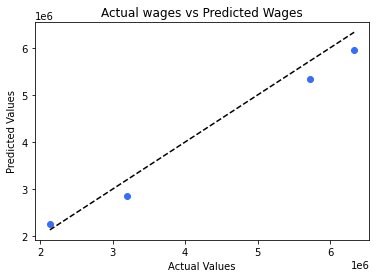

In [88]:
# create a scatter plot with actual vs predicted values
plt.scatter(y_test, y_pred)

# set x and y axis labels
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Actual wages vs Predicted Wages'); 

# show the plot
plt.show()

#### Tuning hyperparameters

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# create a dictionary for the models and the parameters
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),   # Linear regression
        'params' : {
            "fit_intercept": [True, False]
        }
    },
      'Lasso': {
        'model': Lasso(),   # Lasso 
        'params' : {
            "alpha": [0.01, 0.1, 1, 5],
            "fit_intercept": [True, False],
            "normalize": [0,1],
            "positive": [True, False] 
        }
    },
     'Ridge': {
        'model': Ridge(),   # Ridge 
        'params' : {
            "alpha": [0.01, 0.1, 1, 5],
            "fit_intercept": [True, False],
            "normalize": [0,1],
            "solver":['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }
    }
}

LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [185]:
#create a dataframe
from sklearn.metrics import accuracy_score
scores = []

for model_name, mp in model_params.items():
    # create classifier with model and parameters
    clf =  GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False, error_score="raise")
    #fit to the model
    clf.fit(X_train,y_train)
    # add score into the dataset
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])
#stop cutting off text in column
pd.set_option('display.max_colwidth', -1)

#view table
result

,model,best_score,best_params
0,LinearRegression,0.988912,{'fit_intercept': True}
1,Lasso,0.986697,"{'alpha': 5, 'fit_intercept': False, 'normalize': 0, 'positive': False}"
2,Ridge,0.990481,"{'alpha': 0.01, 'fit_intercept': False, 'normalize': 0, 'solver': 'sparse_cg'}"


In [187]:
# not scaled data
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.33, random_state=0)

In [189]:
scores = []

for model_name, mp in model_params.items():
    # create classifier with model and parameters
    clf =  GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False, error_score="raise")
 
    clf.fit(X_train_ns,y_train_ns)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])
result

,model,best_score,best_params
0,LinearRegression,0.954549,{'fit_intercept': False}
1,Lasso,0.981509,"{'alpha': 5, 'fit_intercept': True, 'normalize': 1, 'positive': False}"
2,Ridge,0.998311,"{'alpha': 5, 'fit_intercept': False, 'normalize': 0, 'solver': 'lsqr'}"


In [191]:
# scaled using MinMax scaler (recommended when data not normal)

In [194]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_train_m = sc.fit_transform(X_train_ns)
X_test_m = sc.transform(X_test_ns)

In [195]:
scores = []

for model_name, mp in model_params.items():
    # create classifier with model and parameters
    clf =  GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False, error_score="raise")
 
    clf.fit(X_train_m,y_train_ns)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])
result

,model,best_score,best_params
0,LinearRegression,0.978286,{'fit_intercept': True}
1,Lasso,0.981689,"{'alpha': 5, 'fit_intercept': True, 'normalize': 0, 'positive': False}"
2,Ridge,0.954470,"{'alpha': 0.01, 'fit_intercept': True, 'normalize': 1, 'solver': 'lsqr'}"
